In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_columns', None)

In [350]:
# loading the data and configuring the columns to save memory
sales_total = pd.read_csv(r"C:\Users\Dotan\Desktop\Studies\Dotan\Projects\Summary Project\France-Total-Sales.csv",
                        delimiter=',', low_memory=False, parse_dates = ["sale_date"],
                       usecols = ['sale_date','sale_type','sale_price','street_number','street_suffix','street_name','postal_code',
                                  'township','number_of_lots','property_type','surface_sqmt','number_of_rooms','nature_type',
                                  'terrain_sqmt','full_address','postal_main','postal_area'],
                       dtype = { 'sale_type':'category',
                                 'sale_price':'int32',
                                 'street_number':'float16',
                                 'street_suffix':'category',
                                 'street_name':'category',
                                 'postal_code':'category',
                                 'township':'category',
                                 'number_of_lots':'int8',
                                 'property_type':'category',
                                 'surface_sqmt':'float16',
                                 'number_of_rooms':'float16',
                                 'nature_type':'category',
                                 'terrain_sqmt':'float16',
                                 'full_address':'category',
                                 'postal_main':'category',
                                 'postal_area':'object'
                                 })


# <class 'pandas.core.frame.DataFrame'>
# Int64Index: 15152581 entries, 0 to 827104
# Data columns (total 15 columns):
# #   Column           Dtype         
# ---  ------           -----         
# 0   sale_date        datetime64[ns]
# 1   sale_type        category      
# 2   sale_price       float32       
# 3   street_number    float16       
# 4   street_suffix    category      
# 5   street_name      category      
# 6   postal_code      int32         
# 7   township         category      
# 8   number_of_lots   int8          
# 9   property_type    category      
# 10  surface_sqmt     float16       
# 11  number_of_rooms  float16       
# 12  nature_type      category      
# 13  terrain_sqmt     float16       
# 14  full_address     category      
# 15  postal_main      category      
# 16  postal_area      object        
# dtypes: category(8), datetime64[ns](1), float16(4), int32(1), int8(1), object(2)
# memory usage: 1.4 GB

In [4]:
sales_total.head()

,sale_date,sale_type,sale_price,street_number,street_suffix,street_name,postal_code,township,number_of_lots,property_type,surface_sqmt,number_of_rooms,nature_type,terrain_sqmt,full_address,postal_main,postal_area
0,2015-01-07,Sale,200000,17.0,LOT,DU CLOS DES ACACIAS,01340,SAINT-DIDIER-D AUSSIAT,0,House,85.0,4.0,S,932.0,"17 DU CLOS DES ACACIAS, SAINT-DIDIER-D AUSSIAT...",01,East - Auvergne Rhone Alpes
1,2015-01-07,Sale,95000,1189.0,NaN,DES VILLAGES,01250,HAUTECOURT-ROMANECHE,0,House,116.0,6.0,S,185.0,"1189 DES VILLAGES, HAUTECOURT-ROMANECHE, Franc...",01,East - Auvergne Rhone Alpes
2,2015-01-07,Sale,77000,18.0,RUE,SOUS L ORME,01250,CORVEISSIAT,0,House,50.0,4.0,S,176.0,"18 SOUS L ORME, CORVEISSIAT, France 01250",01,East - Auvergne Rhone Alpes
3,2015-01-07,Sale,40000,281.0,AV,DE MACON,01440,VIRIAT,2,Appartment,29.0,1.0,NaN,NaN,"281 DE MACON, VIRIAT, France 01440",01,East - Auvergne Rhone Alpes
4,2015-03-07,Sale,320130,477.0,CHE,DES CONDAMINES,01310,BUELLAS,0,House,188.0,8.0,S,1293.0,"477 DES CONDAMINES, BUELLAS, France 01310",01,East - Auvergne Rhone Alpes


In [5]:
sales_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5487064 entries, 0 to 5487063
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   sale_date        datetime64[ns]
 1   sale_type        category      
 2   sale_price       int32         
 3   street_number    float16       
 4   street_suffix    category      
 5   street_name      category      
 6   postal_code      category      
 7   township         category      
 8   number_of_lots   int8          
 9   property_type    category      
 10  surface_sqmt     float16       
 11  number_of_rooms  float16       
 12  nature_type      category      
 13  terrain_sqmt     float16       
 14  full_address     category      
 15  postal_main      category      
 16  postal_area      object        
dtypes: category(9), datetime64[ns](1), float16(4), int32(1), int8(1), object(1)
memory usage: 382.4+ MB


## Now that we have our file ready to work, We'll start making analysis changes to it, and analyze it

In [117]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_theme()

In [351]:
# creating date columns
sales_total['sale_year'] = sales_total['sale_date'].dt.year
sales_total['sale_quarter'] = sales_total['sale_date'].dt.quarter
sales_total['sale_month'] = sales_total['sale_date'].dt.month

In [352]:
# adding another column of a more stacked postal area
sales_total['direction'] = sales_total['postal_area']

In [353]:
def direction(string):
    output = string
    if output.startswith('Center') == True:
        output = 'Center'
        return output
    elif output.startswith('North') == True:
        output = 'North'
        return output
    elif output.startswith('West') == True:
        output = 'West'
        return output
    elif output.startswith('East') == True:
        output = 'East'
        return output
    elif output.startswith('South') == True:
        output = 'South'
        return output
    elif output.endswith('Paris') == True:
        output = 'Paris'
        return output
    else:
        return output

In [354]:
sales_total['direction'] = sales_total['direction'].apply(direction)

In [355]:
sales_total.groupby('direction')['direction'].count().to_frame()

,direction
direction,
Center,988502
Corsica / Outside / Undefined,81487
East,659591
North,1404896
South,1041660
West,1310928


In [358]:
# creating the masks to work with, and a table to show the average price change by years
mask = sales_total['sale_type'] != 'Group Sale'
mask2 = sales_total['number_of_rooms'] >= 1
mask3 = sales_total['number_of_rooms'] <= 5
price_by_year = sales_total[mask & mask2 & mask3].groupby(['number_of_rooms',
                    'sale_year']).agg({'sale_price':'mean',
                                             'sale_type':'count'}).round()

In [359]:
price_by_year = price_by_year.reset_index()

In [364]:
price_by_year

,number_of_rooms,sale_year,sale_price,sale_type
0,1.0,2015,106393.0,30637
1,1.0,2016,105080.0,58516
2,1.0,2017,111232.0,65628
3,1.0,2018,112301.0,64380
4,1.0,2019,120586.0,61499
5,1.0,2020,132763.0,18002
6,2.0,2015,152080.0,64391
7,2.0,2016,148327.0,120134
8,2.0,2017,154790.0,137973
9,2.0,2018,158187.0,133378


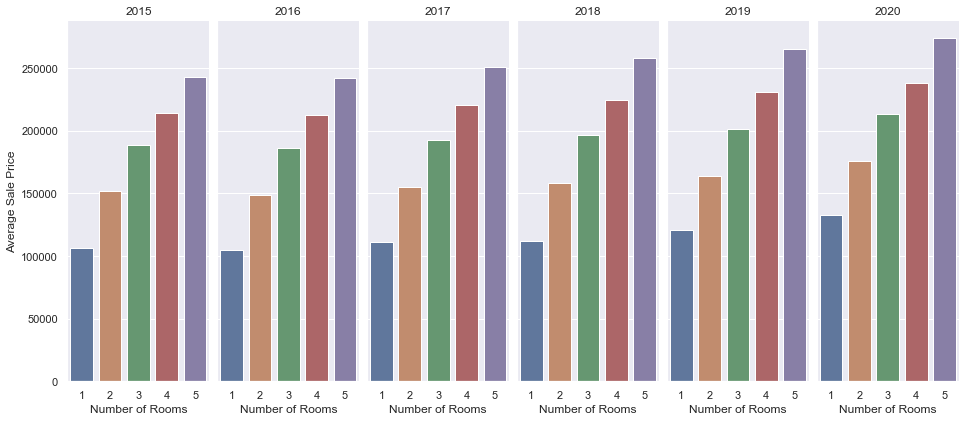

In [365]:
g = sns.catplot(x="number_of_rooms", y="sale_price", col="sale_year",
                data=price_by_year, saturation=.6,
                kind="bar", aspect=.7)
(g.set_axis_labels("Number of Rooms", "Average Sale Price")
  .set_xticklabels(["1", "2", "3", "4","5"])
  .set_titles("{col_name}"))
g.fig.set_size_inches(13,6)


In [487]:
# creating the basic masks to work with on all the rest of the graphs
mask = sales_total['sale_type'] != 'Group Sale'
mask2 = sales_total['number_of_rooms'].between(1,5)

In [544]:
# creating a pivot table for a heatmap of postal areas with an average of sale price
sales_heat = sales_total[mask & mask2].pivot_table(index = 'postal_area',
                  columns = 'sale_year',
                  values = 'sale_price',
                  aggfunc = 'mean')
sales_heat = sales_heat.round()

In [543]:
sales_heat

sale_year,2015,2016,2017,2018,2019,2020
postal_area,,,,,,
Center - Centre Val de Loire,124233.0,124689.0,126876.0,127659.0,130340.0,131385.0
Center - Val-de-Loire - Central Paris,441063.0,444134.0,477233.0,507025.0,541063.0,567640.0
Center - Val-de-Loire - Paris,298394.0,298931.0,308975.0,325572.0,341513.0,335412.0
"Center, East - Bourgogne Franche-Comte",117800.0,116220.0,119715.0,121970.0,117156.0,109569.0
Corsica / Outside / Undefined,190135.0,180819.0,184877.0,194820.0,202636.0,211588.0
East - Auvergne Rhone Alpes,180251.0,180916.0,185888.0,189210.0,187292.0,196561.0
North - Hauts de-France,142624.0,140241.0,145897.0,147454.0,148273.0,156426.0
North - Normandie,133281.0,132842.0,135677.0,138719.0,136965.0,141848.0
"North, Center - ile de-France",231683.0,229228.0,235219.0,239104.0,244956.0,243026.0


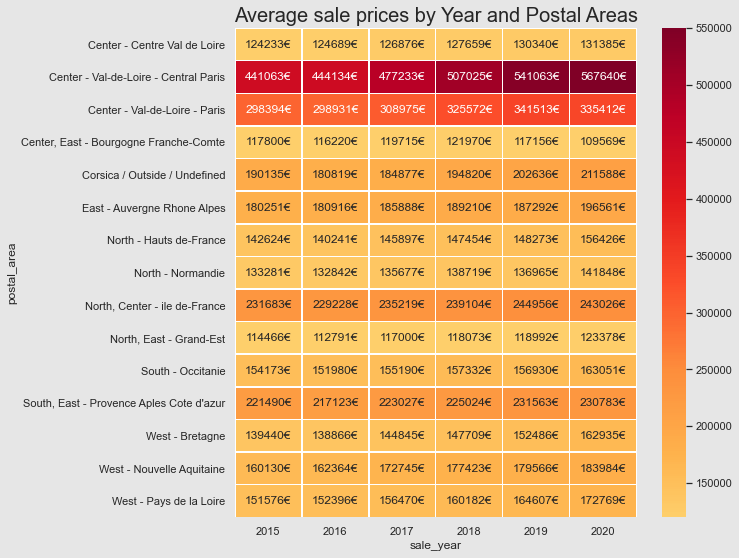

In [557]:
# Loading the pivot table into a Seaborn Heatmap to observe the data
sns.set(font_scale=1)
sns.set(rc={'axes.facecolor':'#E6E6E6', 'figure.facecolor':'#E6E6E6'})
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 9))
# fmt='.0f' to show the numbers as a whole number, without .00... after it
test_heat = sns.heatmap(sales_heat, vmin=120000, vmax=550000, center=250000, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=.5,
                        ax=ax)
ax.set_title('Average sale prices by Year and Postal Areas', size=20)
# adding the euro symbol to all the values in the table
for t in test_heat.texts: t.set_text(t.get_text() + "€")

In [485]:
# creating another pivot table for a heat map by sale price average on the bigger postal areas
sales_direction_heat = sales_total[mask & mask2].pivot_table(index = 'direction',
                  columns = 'sale_year',
                  values = 'sale_price',
                  aggfunc = 'mean')
sales_direction_heat = sales_direction_heat.round()

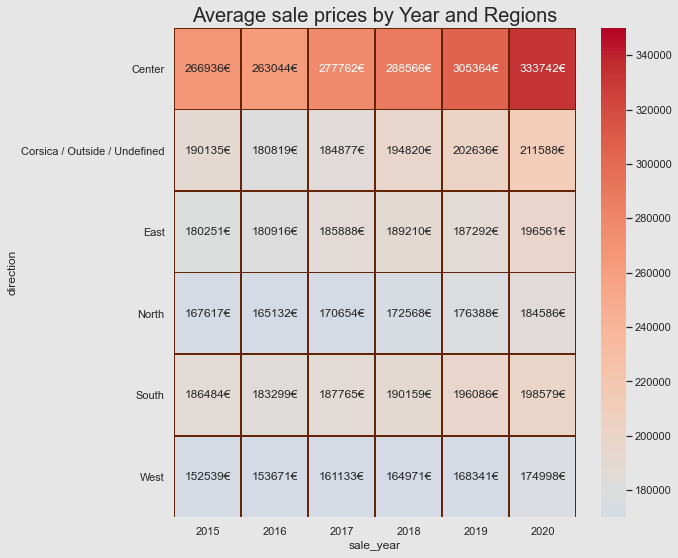

In [651]:
sns.set(font_scale=1)
sns.set(rc={'axes.facecolor':'#E6E6E6', 'figure.facecolor':'#E6E6E6'})
f, ax = plt.subplots(figsize=(9, 9))
test_heat = sns.heatmap(sales_direction_heat, vmin=170000, vmax=350000, center=180000, cmap='coolwarm', annot=True, fmt='g', linewidths=.5,
                        ax=ax, cbar=True, linecolor='#652404')
ax.set_title('Average sale prices by Year and Regions', size=20)
for t in test_heat.texts: t.set_text(t.get_text() + "€")

In [373]:
sales_total.groupby('direction')['direction'].count().to_frame()

,direction
direction,
Center,988502
Corsica / Outside / Undefined,81487
East,659591
North,1404896
South,1041660
West,1310928


In [491]:
# creating another pivot table for a heat map by full address to count the number of properties sold by postal area
sales_heat_count = sales_total[mask & mask2].pivot_table(index = 'postal_area',
                  columns = 'sale_quarter',
                  values = 'full_address',
                  aggfunc = 'count')
sales_heat_count 

sale_quarter,1,2,3,4
postal_area,,,,
Center - Centre Val de Loire,26332,29291,30309,30935
Center - Val-de-Loire - Central Paris,34313,37391,37440,39136
Center - Val-de-Loire - Paris,55353,60623,63778,63925
"Center, East - Bourgogne Franche-Comte",26828,29603,33113,32204
Corsica / Outside / Undefined,9875,10587,11748,12761
East - Auvergne Rhone Alpes,90217,99830,107116,108747
North - Hauts de-France,60226,67242,70092,70121
North - Normandie,30923,33907,36614,36652
"North, Center - ile de-France",63222,70042,73185,70159


Text(0.5, 1.0, 'Average sale price by Quarters')

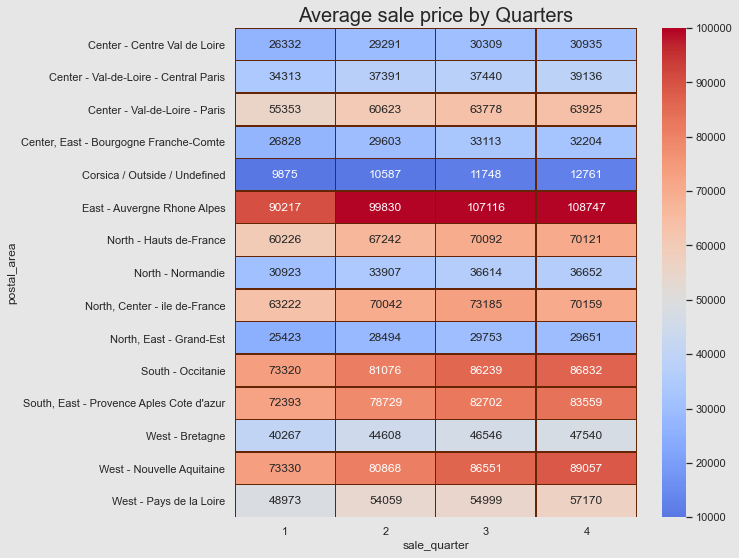

In [558]:
sns.set(font_scale=1)
sns.set(rc={'axes.facecolor':'#E6E6E6', 'figure.facecolor':'#E6E6E6'})
f, ax = plt.subplots(figsize=(9, 9))
sales_heat_count_g = sns.heatmap(sales_heat_count, vmin=10000, vmax=100000, center=50000, cmap='coolwarm', annot=True, fmt='g', linewidths=.5,
                        ax=ax, cbar=True, linecolor='#652404')
ax.set_title('Average sale price by Quarters', size=20)

In [522]:
# creating another pivot table for a heat map by full address to count the number of properties sold by region

sales_heat_count_d = sales_total[mask  & mask2].pivot_table(index = 'direction',
                  columns = 'sale_quarter',
                  values = 'full_address',
                  aggfunc = 'count')
sales_heat_count_d 

sale_quarter,1,2,3,4
direction,,,,
Center,142826,156908,164640,166200
Corsica / Outside / Undefined,9875,10587,11748,12761
East,90217,99830,107116,108747
North,179794,199685,209644,206583
South,145713,159805,168941,170391
West,162570,179535,188096,193767


Text(0.5, 1.0, 'Total amount of sales by Quarters and by Regions')

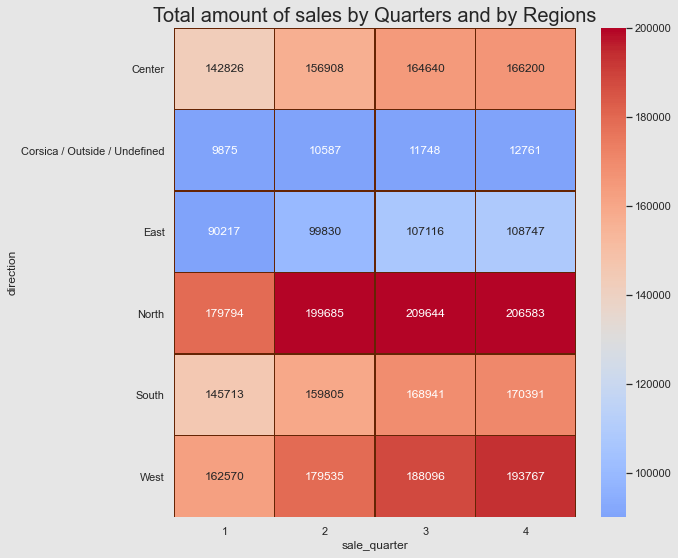

In [732]:
# Load the example flights dataset and convert to long-form
sns.set(font_scale=1)
sns.set(rc={'axes.facecolor':'#E6E6E6', 'figure.facecolor':'#E6E6E6'})
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 9))
sales_heat_count_d_g = sns.heatmap(sales_heat_count_d, vmin=90000, vmax=200000, center=130000, cmap='coolwarm', annot=True, fmt='g', linewidths=.5,
                        ax=ax, cbar=True, linecolor='#652404')
ax.set_title('Total amount of sales by Quarters and by Regions', size=20)

In [ ]:
# I want to analyze the 83 area price change by room numbers and year, best quarter by sale count and average sale price

In [687]:
# new mask for this calculation on postal_main 83 (zip codes that start with 83), starting with year and sale price average
mask3 = sales_total['postal_main'] == '83'
area83_year = sales_total[mask  & mask2 & mask3].pivot_table(index = 'sale_year',
                  columns = 'number_of_rooms',
                  values = 'sale_price',
                  aggfunc = 'mean').round()
area83_year 

number_of_rooms,1.0,2.0,3.0,4.0,5.0
sale_year,,,,,
2015,111045.0,155721.0,227621.0,289146.0,367995.0
2016,110693.0,155886.0,221692.0,282456.0,354472.0
2017,107117.0,156742.0,228586.0,292433.0,380737.0
2018,106566.0,160946.0,226007.0,299037.0,380536.0
2019,110248.0,158834.0,228591.0,303972.0,387450.0
2020,115415.0,155504.0,228402.0,300950.0,411479.0


<AxesSubplot:xlabel='sale_year'>

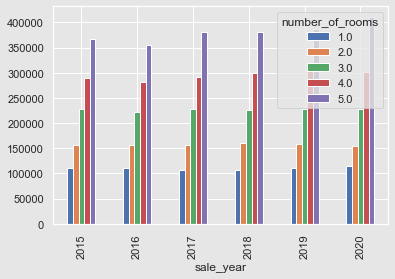

In [690]:
area83_year.plot(kind='bar')

In [681]:
area83_year = area83_year.reset_index()

In [682]:
area83_year

number_of_rooms,sale_year,1.0,2.0,3.0,4.0,5.0
0,2015,111045.0,155721.0,227621.0,289146.0,367995.0
1,2016,110693.0,155886.0,221692.0,282456.0,354472.0
2,2017,107117.0,156742.0,228586.0,292433.0,380737.0
3,2018,106566.0,160946.0,226007.0,299037.0,380536.0
4,2019,110248.0,158834.0,228591.0,303972.0,387450.0
5,2020,115415.0,155504.0,228402.0,300950.0,411479.0


In [695]:
mask3 = sales_total['postal_main'] == '83'
area83_year = sales_total[mask & mask2 & mask3].groupby(['sale_year','number_of_rooms']).agg({'sale_price':'mean','full_address':'count'}).round()
area83_year = area83_year.reset_index()
area83_year

,sale_year,number_of_rooms,sale_price,full_address
0,2015,1.0,111045.0,798
1,2015,2.0,155721.0,1775
2,2015,3.0,227621.0,2265
3,2015,4.0,289146.0,1721
4,2015,5.0,367995.0,548
5,2016,1.0,110693.0,1615
6,2016,2.0,155886.0,3480
7,2016,3.0,221692.0,4249
8,2016,4.0,282456.0,3312
9,2016,5.0,354472.0,1072


In [693]:
mask3 = sales_total['postal_main'] == '83'
area83_quarter = sales_total[mask & mask2 & mask3].groupby(['sale_quarter','number_of_rooms']).agg({'sale_price':'mean','full_address':'count'}).round()
area83_quarter = area83_quarter.reset_index()
area83_quarter

,sale_quarter,number_of_rooms,sale_price,full_address
0,1,1.0,110207.0,1954
1,1,2.0,158255.0,4161
2,1,3.0,222645.0,5026
3,1,4.0,298614.0,4169
4,1,5.0,377643.0,1307
5,2,1.0,108903.0,2169
6,2,2.0,154269.0,4582
7,2,3.0,227205.0,5582
8,2,4.0,289052.0,4568
9,2,5.0,376274.0,1476


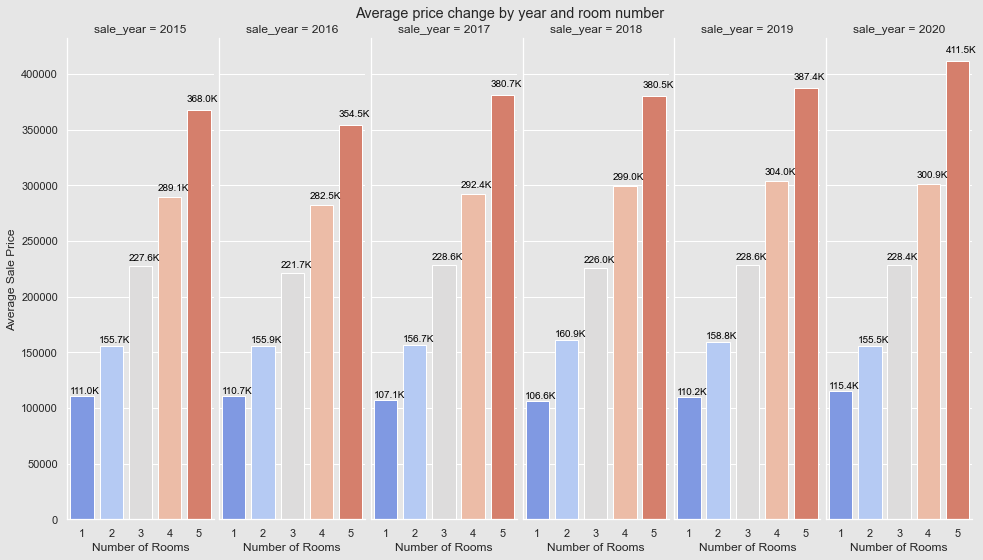

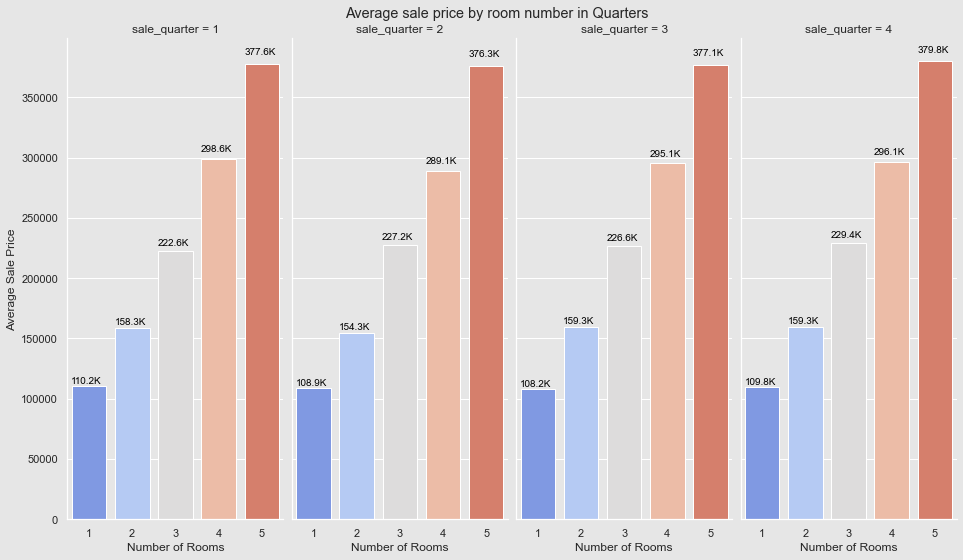

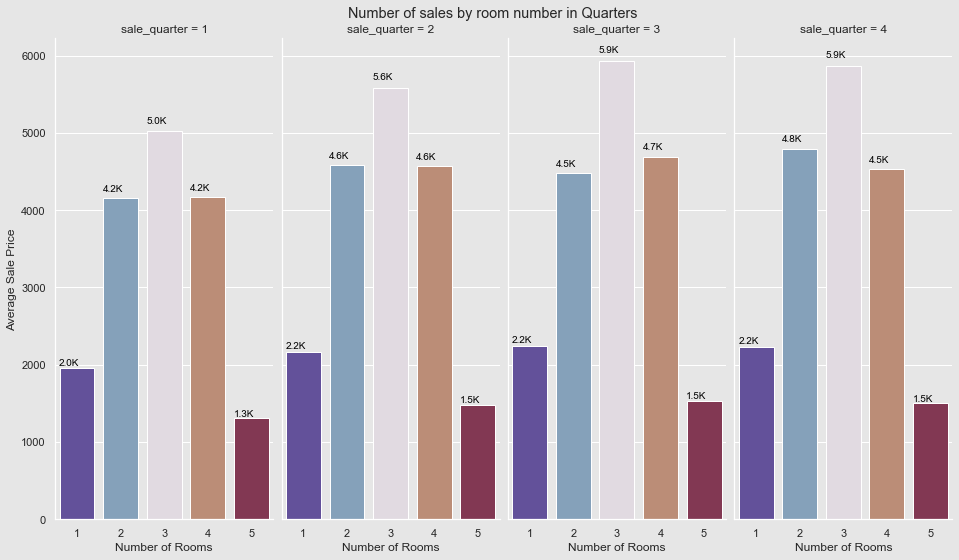

In [731]:
# creating graphs, number 1 for the average price change by year and room number
# number 2 to find the best quarter to buy in by average sale price and room number
# number 3 to find the best quarter to buy in by number of sales and room number
g = sns.catplot(x="number_of_rooms", y="sale_price", col="sale_year", data=area83_year, kind="bar", palette="coolwarm")
g.set_axis_labels("Number of Rooms", "Average Sale Price").set_xticklabels(["1", "2", "3", "4","5"])
g.fig.set_size_inches(13,8)
g.fig.suptitle('Average price change by year and room number')
ax = g.facet_axis(0,5)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,4)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,3)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,2)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
g3 = sns.catplot(x="number_of_rooms", y="sale_price", col="sale_quarter", data=area83_quarter, kind="bar", palette='coolwarm')
g3.set_axis_labels("Number of Rooms", "Average Sale Price").set_xticklabels(["1", "2", "3", "4","5"])
g3.fig.set_size_inches(13,8)
g3.fig.suptitle('Average sale price by room number in Quarters')
ax = g3.facet_axis(0,3)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g3.facet_axis(0,2)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g3.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g3.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')

g2 = sns.catplot(x="number_of_rooms", y="full_address", col="sale_quarter", data=area83_quarter, kind="bar", palette='twilight_shifted')
g2.set_axis_labels("Number of Rooms", "Average Sale Price").set_xticklabels(["1", "2", "3", "4","5"])
g2.fig.set_size_inches(13,8)
g2.fig.suptitle('Number of sales by room number in Quarters')
ax = g2.facet_axis(0,3)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g2.facet_axis(0,2)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g2.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g2.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')


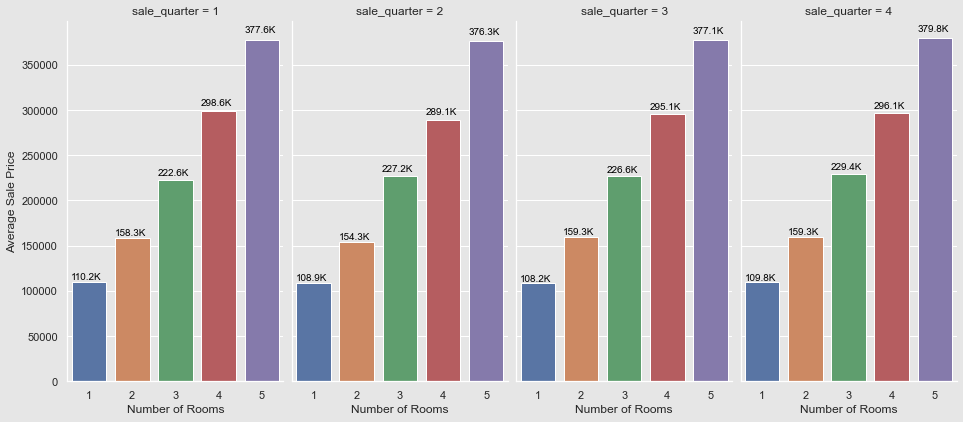

In [648]:
g = sns.catplot(x="number_of_rooms", y="sale_price", col="sale_quarter", data=area83_quarter, kind="bar")
g.set_axis_labels("Number of Rooms", "Average Sale Price").set_xticklabels(["1", "2", "3", "4","5"])
g.fig.set_size_inches(13,6)
ax = g.facet_axis(0,3)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,2)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')


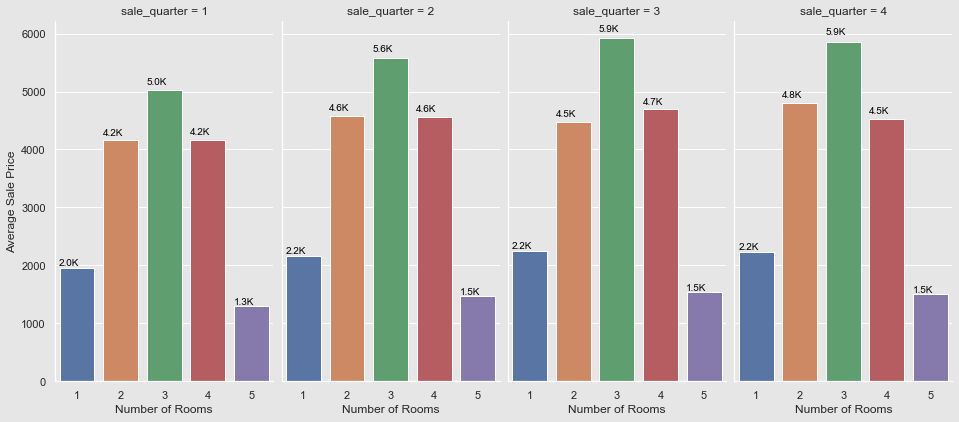

In [650]:
g = sns.catplot(x="number_of_rooms", y="full_address", col="sale_quarter", data=area83_quarter, kind="bar")
g.set_axis_labels("Number of Rooms", "Average Sale Price").set_xticklabels(["1", "2", "3", "4","5"])
g.fig.set_size_inches(13,6)
ax = g.facet_axis(0,3)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,2)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')


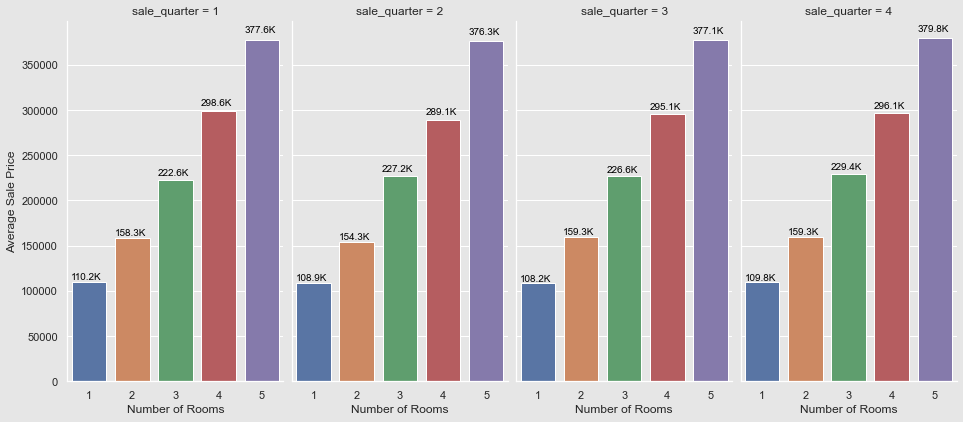

In [700]:
g = sns.catplot(x="number_of_rooms", y="sale_price", col="sale_quarter", data=area83_quarter, kind="bar")
g.set_axis_labels("Number of Rooms", "Average Sale Price").set_xticklabels(["1", "2", "3", "4","5"])
g.fig.set_size_inches(13,6)
ax = g.facet_axis(0,3)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,2)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')


In [292]:
# checking the big data's actual memory usage after all the filtering and trying to reduce more memory after all changes
sales_total.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5487064 entries, 0 to 5487063
Data columns (total 21 columns):
 #   Column           Dtype         
---  ------           -----         
 0   sale_date        datetime64[ns]
 1   sale_type        category      
 2   sale_price       int32         
 3   street_number    float16       
 4   street_suffix    category      
 5   street_name      category      
 6   postal_code      category      
 7   township         category      
 8   number_of_lots   int8          
 9   property_type    category      
 10  surface_sqmt     float16       
 11  number_of_rooms  float16       
 12  nature_type      category      
 13  terrain_sqmt     float16       
 14  full_address     category      
 15  postal_main      category      
 16  postal_area      object        
 17  sale_year        int64         
 18  sale_quarter     int64         
 19  sale_month       int64         
 20  direction        object        
dtypes: category(9), datetime64[ns](

In [374]:
sales_total['sale_year'] = sales_total['sale_year'].astype(np.int32)

In [375]:
sales_total['sale_quarter'] = sales_total['sale_quarter'].astype(np.int8)

In [376]:
sales_total['sale_month'] = sales_total['sale_month'].astype(np.int16)

In [377]:
# reducing more memory
for col in ['direction']:
    sales_total[col] = sales_total[col].astype('category')

In [306]:
# memory was reduced from 1.5GB to 1.1GB
sales_total.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5487064 entries, 0 to 5487063
Data columns (total 21 columns):
 #   Column           Dtype         
---  ------           -----         
 0   sale_date        datetime64[ns]
 1   sale_type        category      
 2   sale_price       int32         
 3   street_number    float16       
 4   street_suffix    category      
 5   street_name      category      
 6   postal_code      category      
 7   township         category      
 8   number_of_lots   int8          
 9   property_type    category      
 10  surface_sqmt     float16       
 11  number_of_rooms  float16       
 12  nature_type      category      
 13  terrain_sqmt     float16       
 14  full_address     category      
 15  postal_main      category      
 16  postal_area      object        
 17  sale_year        int32         
 18  sale_quarter     int8          
 19  sale_month       int16         
 20  direction        category      
dtypes: category(10), datetime64[ns]

In [309]:
sales_total.tail()

,sale_date,sale_type,sale_price,street_number,street_suffix,street_name,postal_code,township,number_of_lots,property_type,surface_sqmt,number_of_rooms,nature_type,terrain_sqmt,full_address,postal_main,postal_area,sale_year,sale_quarter,sale_month,direction
5487059,2020-06-30,Sale,520000,55.0,RUE,MONTMARTRE,75002,PARIS 02,2,Appartment,47.0,3.0,NaN,NaN,"55 MONTMARTRE, PARIS 02, France 75002",75,Center - Val-de-Loire - Central Paris,2020,2,6,Center
5487060,2020-06-26,Sale,1740000,4.0,RUE,REAUMUR,75002,PARIS 02,2,Appartment,150.0,5.0,NaN,NaN,"4 REAUMUR, PARIS 02, France 75002",75,Center - Val-de-Loire - Central Paris,2020,2,6,Center
5487061,2020-06-25,Sale,725000,16.0,RUE,CHARLEMAGNE,75004,PARIS 04,1,Appartment,48.0,3.0,NaN,NaN,"16 CHARLEMAGNE, PARIS 04, France 75004",75,Center - Val-de-Loire - Central Paris,2020,2,6,Center
5487062,2020-06-23,Sale,200000,7.0,RUE,CHABANAIS,75002,PARIS 02,3,Appartment,26.0,1.0,NaN,NaN,"7 CHABANAIS, PARIS 02, France 75002",75,Center - Val-de-Loire - Central Paris,2020,2,6,Center
5487063,2020-11-06,Sale,433000,3.0,RUE,SAINT-JOSEPH,75002,PARIS 02,1,Appartment,33.0,1.0,NaN,NaN,"3 SAINT-JOSEPH, PARIS 02, France 75002",75,Center - Val-de-Loire - Central Paris,2020,4,11,Center


In [378]:
# exporting the big data to one file
sales_total.to_csv('France-Total-Sales.csv', index=False, sep=',', encoding='utf-8')